<a href="https://colab.research.google.com/github/stepsbtw/Statistics-Inference-AI-and-ML/blob/main/00_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Samples
- Any subset of a population. (n) is the size of the sample, number of individuals in it.

## Parameter X Sample statistic
- A parameter measure some caracteristic of a **Population**. It is a number, a constant, that we generally don't know.

- A statistic, is a function calculed from a sample (Random variable).

### Notation:
**PARAMETERS** (Populational measures)
- μ => Mean
- σ² => Variance
- σ => Standard deviation
- p => Proportion

**STATISTICS** (Sample Random Variables)
- ̅x => Mean (Hope, expected value)
- s² => Variance
- s => Std dev
- ^p => Proportion

#Sample Plans
Given a population with size N, the quantity of possible samples are:

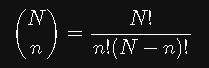

# In practice:

In [2]:
import pandas as pd
import numpy as np

In [3]:
import kagglehub

# Download DATASET
path = kagglehub.dataset_download("NUFORC/ufo-sightings")

IsADirectoryError: [Errno 21] Is a directory: '/root/.cache/kagglehub/datasets/NUFORC/ufo-sightings/versions/2'

In [6]:
df = pd.read_csv(f"{path}/scrubbed.csv")
df.head()

<ipython-input-6-12bce7cbcfee>:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{path}/scrubbed.csv")


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


### Columns
- datetime : when ufo was seen
- city
- country
- shape : the format of the ufo
- duration : for how much time
- comments
- date posted
- latitude
- longitude

In [13]:
df.info() # here we can check if the data contains null values.
print(f"\nshape: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB

shape: (80332, 11)


It seems like state, country, shape and comments, are not filled for all rows of the dataframe.
We can see too, that this dataset is fairly big to work with.

# Simple Random Sampling

In [17]:
sample = df.sample(n=100)
sample.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
72764,9/10/1983 19:00,mulberry (near),in,us,light,900.0,15 minutes,Aircraft chasing ufo,8/16/2002,40.344444,-86.665278
42918,5/17/2009 21:39,newnan,ga,us,light,60,60 seconds,swift blue light&#44 like a butterfly flight p...,6/9/2009,33.3805556,-84.799722
40357,4/5/2006 06:05,newhall,ca,us,circle,5,5 seconds,saw light which &quot;imploded&quot; upon its...,5/15/2006,34.3847222,-118.530000
59401,7/24/2002 00:30,albany,ny,us,fireball,10,5-10 seconds,An incredible bright white orb sped past at an...,8/16/2002,42.6525000,-73.756667
74180,9/13/2007 20:55,loveland,oh,us,fireball,180.0,3 minutes,Inexplicable fires in sky over Clermont County...,10/8/2007,39.268889,-84.263889


In [18]:
sample.shape

(100, 11)

#Stratified Random Sampling
- For this, we need to define a caracteristic that separates the data in groups. For example : the atribute **country**

<Axes: >

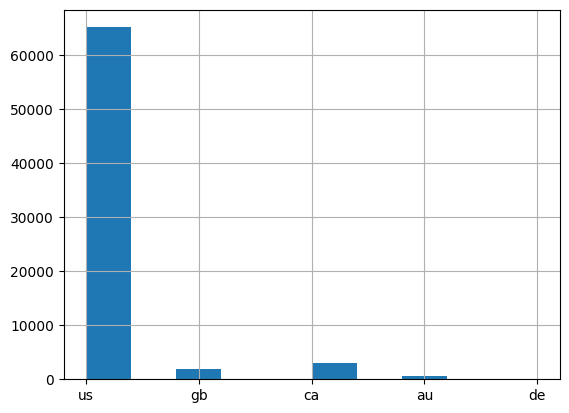

In [19]:
df.country.hist()

<ipython-input-21-205f7421f705>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = df.groupby("country").apply(lambda x: x.sample(frac = 0.1))


<Axes: >

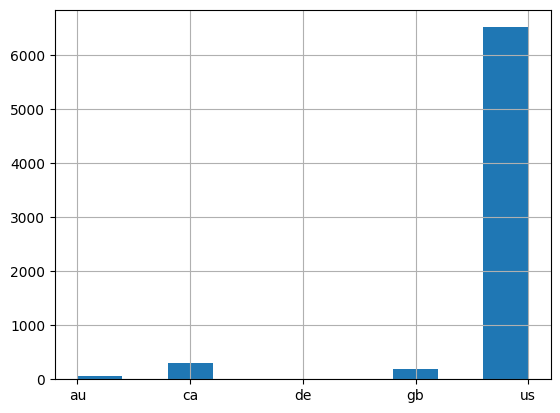

In [21]:
stratified_sample = df.groupby("country").apply(lambda x: x.sample(frac = 0.1))
# here we took 10% of our data and remanaged it in groups.

stratified_sample.country.hist()

Nice that it retain the proportions of the original population.